## 1. Importation des données

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
import re
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,3)

In [102]:
df1 = pd.read_csv("C:/Users/HAMZA/Desktop/Studies/BIHAR/TPT/Donnees par groupe/Groupe_TPT_4/Groupe_TPT_4/Clients_41.csv",encoding = "ISO-8859-1")
df2 = pd.read_csv("C:/Users/HAMZA/Desktop/Studies/BIHAR/TPT/Donnees par groupe/Groupe_TPT_4/Groupe_TPT_4/Clients_42.csv",encoding = "ISO-8859-1")
data_marketing = pd.read_csv('C:/Users/HAMZA/Desktop/Studies/BIHAR/TPT/Donnees communes/Marketing/Marketing.csv', encoding='ISO-8859-1')
data_catalogue = pd.read_csv('C:/Users/HAMZA/Desktop/Studies/BIHAR/TPT/Donnees communes/Catalogue/Catalogue.csv', encoding='ISO-8859-1')
data_co2 = pd.read_csv('C:/Users/HAMZA/Desktop/Studies/BIHAR/TPT/Donnees communes/CO2/CO2.csv', encoding='ISO-8859-1')
data_immatriculations = pd.read_csv('C:/Users/HAMZA/Desktop/Studies/BIHAR/TPT/Donnees communes/Immatriculations/Immatriculations.csv', encoding='ISO-8859-1')

## 2. Netoyage des données 

<font color='#9CCC65'>**Fusion des deux DataFrame Client**

In [103]:
data_client = pd.concat([df1, df2])

In [104]:
data_marketing.duplicated().sum()

0

In [105]:
data_catalogue.duplicated().sum()

0

In [106]:
data_co2.duplicated().sum()

0

In [107]:
data_client.duplicated().sum()

0

In [108]:
data_immatriculations.duplicated().sum()

24

In [109]:
data_immatriculations.drop_duplicates(inplace=True)

In [110]:
data_immatriculations.duplicated().sum()

0

<font color='#9CCC65'>**Detection et netoyage des valeurs erronées ou aberantes**

In [111]:
data_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 200000 non-null  object
 1   sexe                200000 non-null  object
 2   taux                200000 non-null  object
 3   situationFamiliale  200000 non-null  object
 4   nbEnfantsAcharge    200000 non-null  object
 5   2eme voiture        200000 non-null  object
 6   immatriculation     200000 non-null  object
dtypes: object(7)
memory usage: 12.2+ MB


In [112]:
data_client.age.value_counts(dropna=False)

28    5083
21    5081
20    5059
18    5043
26    5022
      ... 
67    1518
60    1478
?      213
-1     191
       189
Name: age, Length: 70, dtype: int64

In [113]:
data_client.age.value_counts(dropna=False).drop(['?',' ','-1']).index.astype(int).min()

18

In [114]:
data_client.age.value_counts(dropna=False).drop(['?',' ','-1']).index.astype(int).max()

84

In [115]:
data_client.age.value_counts(dropna=False).drop(['?',' ','-1']).index.astype(int).to_numpy().mean()

51.0

In [116]:
v=np.median(data_client.age.value_counts(dropna=False).drop(['?',' ','-1']).index.astype(int).to_numpy())

- Nous pouvons clairement constaté que les valeurs sont logiques car la variable age commence par l'age du majeur
- Nous avons decider de modifer les valeurs manquantes de la variable age par la médiane

In [117]:
data_client.age.replace([' ','-1','?'],[v,v,v],inplace = True)

In [118]:
data_client['age'] = data_client['age'].astype(int)

In [119]:
data_client.age.value_counts(dropna=False)

28    5083
21    5081
20    5059
18    5043
26    5022
      ... 
75    1554
71    1550
61    1540
67    1518
60    1478
Name: age, Length: 67, dtype: int64

In [120]:
data_client.sexe.value_counts(dropna=False)

M           136631
F            58755
Homme         1390
Masculin      1381
Féminin        633
Femme          598
N/D            212
?              204
               196
Name: sexe, dtype: int64

In [121]:
data_client.sexe.replace(['Homme', 'Femme', 'Masculin', 'Féminin'],['M', 'F','M', 'F'],inplace = True)

In [122]:
data_client.sexe.value_counts(dropna=False)

M      139402
F       59986
N/D       212
?         204
          196
Name: sexe, dtype: int64

In [123]:
data_client.drop(data_client.loc[(data_client['sexe'] == 'N/D') | (data_client['sexe'] == '?') | (data_client['sexe'] == ' ')].index,inplace = True)

In [124]:
data_client.sexe.value_counts(dropna=False)

M    138975
F     59805
Name: sexe, dtype: int64

In [125]:
data_client.situationFamiliale.value_counts(dropna=False)

En Couple      127428
Célibataire     58982
Seule            9746
Marié(e)         1327
Seul              599
?                 203
N/D               197
                  191
Divorcée          107
Name: situationFamiliale, dtype: int64

In [126]:
data_client.situationFamiliale.replace(['En Couple', 'Célibataire', 'Seule', 'Marié(e)','Seul','Divorcée'],['Couple', 'Single','Single', 'Married','Single','Divorced'],inplace = True)

In [127]:
data_client.situationFamiliale.value_counts(dropna=False)

Couple      127428
Single       69327
Married       1327
?              203
N/D            197
               191
Divorced       107
Name: situationFamiliale, dtype: int64

In [128]:
data_client.drop(data_client.loc[(data_client['situationFamiliale'] == 'N/D') | (data_client['situationFamiliale'] == '?') | (data_client['situationFamiliale'] == ' ')].index,inplace = True)

In [129]:
data_client.situationFamiliale.value_counts(dropna=False)

Couple      127055
Single       69114
Married       1326
Divorced       107
Name: situationFamiliale, dtype: int64

In [130]:
data_client.nbEnfantsAcharge.value_counts(dropna=False)

0     88902
1     32629
2     32611
3     23230
4     19695
?       182
-1      177
        176
Name: nbEnfantsAcharge, dtype: int64

In [131]:
data_client.drop(data_client.loc[(data_client['nbEnfantsAcharge'] == '-1') | (data_client['nbEnfantsAcharge'] == '?') | (data_client['nbEnfantsAcharge'] == ' ')].index,inplace = True)

In [132]:
data_client.nbEnfantsAcharge.value_counts(dropna=False)

0    88649
2    32530
1    32526
3    23181
4    19646
Name: nbEnfantsAcharge, dtype: int64

In [133]:
data_client['nbEnfantsAcharge'] = data_client['nbEnfantsAcharge'].astype(int)

In [134]:
data_client.rename(columns={'2eme voiture': 'voiture_2eme'},inplace = True)

In [135]:
data_client.voiture_2eme.value_counts(dropna=False)

false    170867
true      25275
            201
?           189
Name: voiture_2eme, dtype: int64

In [136]:
data_client.drop(data_client.loc[(data_client['voiture_2eme'] == '?') | (data_client['voiture_2eme'] == ' ') ].index,inplace = True)

In [137]:
data_client.voiture_2eme.value_counts(dropna=False)

false    170532
true      25222
Name: voiture_2eme, dtype: int64

In [138]:
data_client.drop(data_client.loc[(data_client['taux'] == '?') | (data_client['taux'] == ' ') | (data_client['taux']== '-1')].index,inplace = True)

In [139]:
data_client['taux'] = data_client['taux'].astype(int)

In [140]:
data_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194552 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 194552 non-null  int32 
 1   sexe                194552 non-null  object
 2   taux                194552 non-null  int32 
 3   situationFamiliale  194552 non-null  object
 4   nbEnfantsAcharge    194552 non-null  int32 
 5   voiture_2eme        194552 non-null  object
 6   immatriculation     194552 non-null  object
dtypes: int32(3), object(4)
memory usage: 9.6+ MB


<font color='#9CCC65'>**Detection de la duplication des index et le traitement**

In [141]:
data_client.index.duplicated()

array([False, False, False, ...,  True,  True,  True])

In [142]:
data_client.reset_index(inplace=True, drop=True)

## 3. Visualisation et analyse exploratoire des données

In [143]:
data_client

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,voiture_2eme,immatriculation
0,80,F,475,Couple,4,true,3591 IK 12
1,61,M,565,Couple,0,true,7787 NW 92
2,56,M,400,Couple,4,false,653 WI 87
3,79,M,535,Couple,0,false,6311 ZZ 15
4,50,M,1263,Couple,4,false,9631 HD 21
...,...,...,...,...,...,...,...
194547,19,M,446,Couple,1,false,9382 RF 20
194548,30,F,590,Single,0,false,5977 PV 17
194549,53,M,176,Couple,3,false,4257 GT 49
194550,73,M,557,Couple,0,false,2636 UO 15


In [144]:
plot_data = data_client.groupby(["age","sexe"]).mean().reset_index()

In [145]:
plot_data["Salary"] = plot_data["taux"]/0.3

In [146]:
plot_data["decade"] = ""

In [147]:
plot_data.loc[(plot_data["age"] < 20), "decade"] = "teens"
plot_data.loc[plot_data["age"] < 30 & , "decade"] = "twenties"
plot_data.loc[plot_data["age"] < 40, "decade"] = "thirties"
plot_data.loc[plot_data["age"] < 50, "decade"] = "forties"
plot_data.loc[plot_data["age"] < 60, "decade"] = "fifties"
plot_data.loc[plot_data["age"] < 70, "decade"] = "sexties"
plot_data.loc[plot_data["age"] < 80, "decade"] = "seventies"
plot_data.loc[plot_data["age"] < 90, "decade"] = "eighties"

SyntaxError: invalid syntax (1447689797.py, line 2)

In [148]:
plot_data.loc[plot_data["age"] < 90, "decade"] = "eighties"
plot_data.loc[plot_data["age"] < 80, "decade"] = "seventies"
plot_data.loc[plot_data["age"] < 70, "decade"] = "sexties"
plot_data.loc[plot_data["age"] < 60, "decade"] = "fifties"
plot_data.loc[plot_data["age"] < 50, "decade"] = "forties"
plot_data.loc[plot_data["age"] < 40, "decade"] = "thirties"
plot_data.loc[plot_data["age"] < 30, "decade"] = "twenties"
plot_data.loc[(plot_data["age"] < 20), "decade"] = "teens"

In [149]:
plot_data.groupby(["decade","sexe"]).mean().reset_index()

,decade,sexe,age,taux,nbEnfantsAcharge,Salary
0,eighties,F,82.0,620.011030,1.213005,2066.703433
1,eighties,M,82.0,606.648054,1.222061,2022.160179
2,fifties,F,54.5,616.409842,1.235529,2054.699473
3,fifties,M,54.5,606.782753,1.250904,2022.609176
4,forties,F,44.5,608.747854,1.235802,2029.159513
5,forties,M,44.5,610.089716,1.249689,2033.632387
6,seventies,F,74.5,606.681086,1.225859,2022.270287
7,seventies,M,74.5,610.274074,1.250048,2034.246913
8,sexties,F,64.5,606.828314,1.222693,2022.761048
9,sexties,M,64.5,606.665829,1.249664,2022.219432


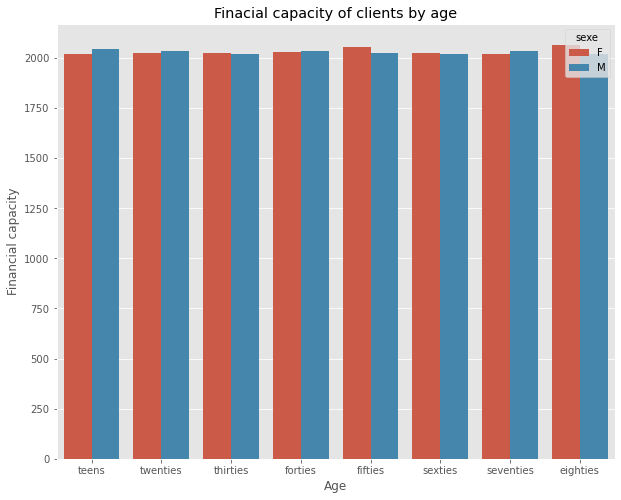

In [150]:
plt.figure(figsize=(10,8))
title = plt.title('Finacial capacity of clients by age')
sns.barplot(data=plot_data.groupby(["decade","sexe"]).mean().reset_index(),
            x="decade", y="Salary", hue = 'sexe',
           order = ["teens","twenties","thirties","forties","fifties","sexties", "seventies","eighties"])
plt.xlabel("Age")
plt.ylabel("Financial capacity")
plt.show()

In [151]:
data_client

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,voiture_2eme,immatriculation
0,80,F,475,Couple,4,true,3591 IK 12
1,61,M,565,Couple,0,true,7787 NW 92
2,56,M,400,Couple,4,false,653 WI 87
3,79,M,535,Couple,0,false,6311 ZZ 15
4,50,M,1263,Couple,4,false,9631 HD 21
...,...,...,...,...,...,...,...
194547,19,M,446,Couple,1,false,9382 RF 20
194548,30,F,590,Single,0,false,5977 PV 17
194549,53,M,176,Couple,3,false,4257 GT 49
194550,73,M,557,Couple,0,false,2636 UO 15


## nbEnfantsAcharges ~ taux

<AxesSubplot:xlabel='age', ylabel='taux'>

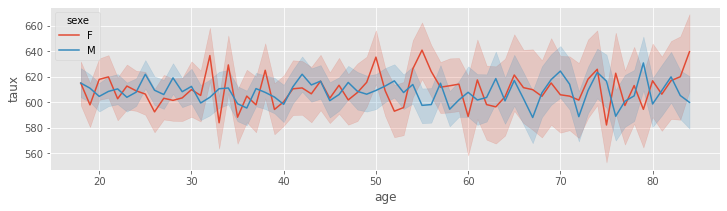

In [152]:
sns.lineplot(data = data_client, hue = 'sexe', x="age",y = "taux")

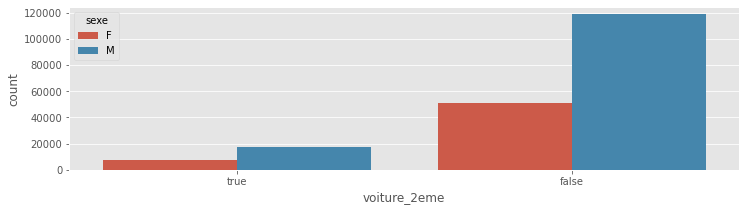

In [153]:
sns.countplot(x=data_client.voiture_2eme, hue=data_client.sexe)
plt.show()

## 4. Creation des clusters 

<font color='#9CCC65'>**Methode KMEANS**

Definition de la fonction permetant de trouver le nombre optimal des cluster

In [154]:
x = data_catalogue.copy()

In [155]:
x.longueur.replace(['courte','moyenne','longue','très longue'],[0,1,2,3],inplace=True)

In [156]:
x.drop(columns = ['couleur','marque','nom','occasion'], inplace = True)

In [157]:
from sklearn.cluster import KMeans
def kmeans_multiple(data, k, n):
    km_best = KMeans(n_clusters=k).fit(data)
    for _ in range(n - 1):
        km = KMeans(n_clusters=k).fit(data)
        if km.inertia_ < km_best.inertia_:
            km_best = km
    return km_best

In [158]:
x

,puissance,longueur,nbPlaces,nbPortes,prix
0,272,3,5,5,50500
1,272,3,5,5,50500
2,272,3,5,5,50500
3,272,3,5,5,35350
4,272,3,5,5,35350
...,...,...,...,...,...
265,75,0,5,5,18310
266,75,0,5,5,18310
267,75,0,5,5,12817
268,75,0,5,5,12817


In [159]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

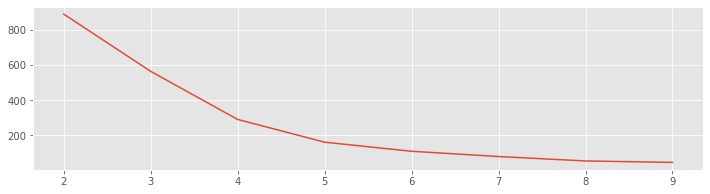

In [160]:
X, Y = [], []
for k in range(2, 10):
    km = kmeans_multiple(x_scaled, k, 20)
    Y.append(km.inertia_)
    X.append(k)
plt.plot(X, Y);

<font color='#FF0000'>- Ce graphe montre qu'àpartir de 4 cluster le dérivé de la fonction commence à tendre vers une valeur fixe, alors on peut choisir le nombre des clusters à partir de 4, dans notre cas on se limite à 4 ou 5 clusters

*NB: le choix un nombre tres grand de cluster peut etre difficile pour l'interpretation*

In [161]:
km = kmeans_multiple(x_scaled, 5, 20)

In [162]:
data_catalogue.longueur.replace(['courte','moyenne','longue','très longue'],[0,1,2,3],inplace=True)

In [163]:
data_catalogue.groupby(km.labels_).mean() 

,puissance,longueur,nbPlaces,nbPortes,occasion,prix
0,178.666667,2.333333,5.0,5.0,0.388889,29259.222222
1,406.500000,3.000000,5.0,5.0,0.500000,83342.500000
2,69.600000,0.000000,5.0,3.0,0.400000,10508.000000
3,143.000000,2.000000,7.0,5.0,0.333333,22263.833333
4,117.238095,0.666667,5.0,5.0,0.428571,18757.904762


In [164]:
data_catalogue.groupby(km.labels_).count() 

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,90,90,90,90,90,90,90,90,90
1,20,20,20,20,20,20,20,20,20
2,25,25,25,25,25,25,25,25,25
3,30,30,30,30,30,30,30,30,30
4,105,105,105,105,105,105,105,105,105


In [165]:
km = kmeans_multiple(x_scaled, 5, 20)

In [166]:
data_catalogue.groupby(km.labels_).mean() 

,puissance,longueur,nbPlaces,nbPortes,occasion,prix
0,178.666667,2.333333,5.0,5.0,0.388889,29259.222222
1,406.500000,3.000000,5.0,5.0,0.500000,83342.500000
2,69.600000,0.000000,5.0,3.0,0.400000,10508.000000
3,143.000000,2.000000,7.0,5.0,0.333333,22263.833333
4,117.238095,0.666667,5.0,5.0,0.428571,18757.904762


In [167]:
data_catalogue.groupby(km.labels_).count() 

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,90,90,90,90,90,90,90,90,90
1,20,20,20,20,20,20,20,20,20
2,25,25,25,25,25,25,25,25,25
3,30,30,30,30,30,30,30,30,30
4,105,105,105,105,105,105,105,105,105


Apres analyse des resultats pour 4 et 5 clasters, nous avons choisi 5 clusters qui peuvent etre interprétés comme suit:

**Groupe 0 :** *Berline*

**Groupe 1 :** *Sportive*

**Groupe 2 :** *Citadine*

**Groupe 3 :** *Familiale*

**Groupe 4 :** *compacte*

  


    

In [168]:
data_catalogue['categorie_kmeans'] = km.labels_

In [169]:
data_catalogue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   marque            270 non-null    object
 1   nom               270 non-null    object
 2   puissance         270 non-null    int64 
 3   longueur          270 non-null    int64 
 4   nbPlaces          270 non-null    int64 
 5   nbPortes          270 non-null    int64 
 6   couleur           270 non-null    object
 7   occasion          270 non-null    bool  
 8   prix              270 non-null    int64 
 9   categorie_kmeans  270 non-null    int32 
dtypes: bool(1), int32(1), int64(5), object(3)
memory usage: 18.3+ KB


In [170]:
pca = PCA(n_components = 2, random_state = 2020)
x_pca = pca.fit_transform(x_scaled)
print(f"Pourcentage d'informations conservées avec les 2 premières composantes : {pca.explained_variance_ratio_[:2].sum()*100:.2f}%")

Pourcentage d'informations conservées avec les 2 premières composantes : 77.14%


[]

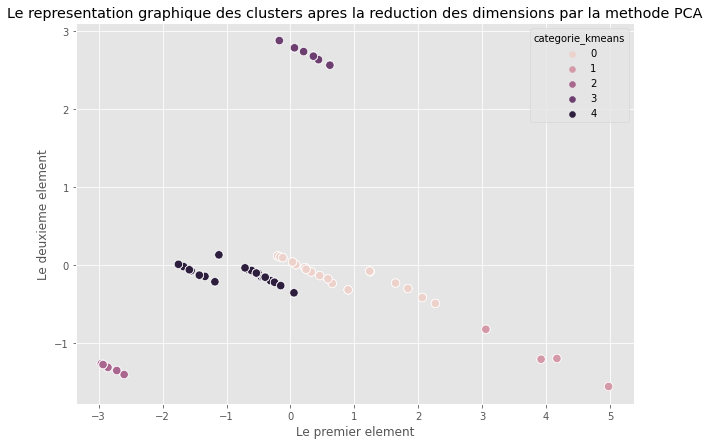

In [171]:
plt.figure(figsize=(10, 7))
sns.scatterplot (x = x_pca[:,0], y= x_pca[:,1], s=70, hue = data_catalogue.categorie_kmeans)
plt.title('Le representation graphique des clusters apres la reduction des dimensions par la methode PCA')
plt.xlabel('Le premier element')
plt.ylabel('Le deuxieme element')
plt.plot()

In [172]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
x_tsne = tsne.fit_transform(x_scaled)

C:\Users\HAMZA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\HAMZA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 270 samples in 0.020s...
[t-SNE] Computed neighbors for 270 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 270 / 270
[t-SNE] Mean sigma: 0.472933
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.225296
[t-SNE] KL divergence after 300 iterations: 0.057691


[]

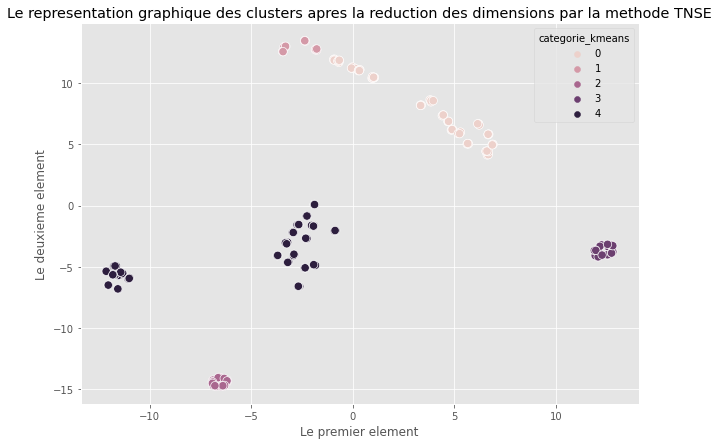

In [173]:
plt.figure(figsize=(10, 7))
sns.scatterplot (x = x_tsne[:,0], y= x_tsne[:,1], s=70, hue = data_catalogue.categorie_kmeans)
plt.title('Le representation graphique des clusters apres la reduction des dimensions par la methode TNSE')
plt.xlabel('Le premier element')
plt.ylabel('Le deuxieme element')
plt.plot()

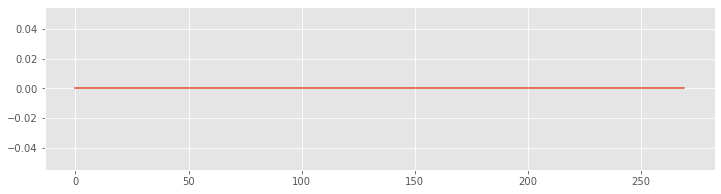

In [174]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_scaled)
distances, indices = nbrs.kneighbors(x_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [175]:
dbscan = DBSCAN(eps=1, min_samples=5, metric='euclidean').fit_predict(x_scaled)

In [176]:
data_catalogue['categorie_dbscan'] = dbscan

In [177]:
data_catalogue.groupby(dbscan).mean() 

,puissance,longueur,nbPlaces,nbPortes,occasion,prix,categorie_kmeans,categorie_dbscan
0,145.589744,1.435897,5.0,5.0,0.410256,23604.666667,2.153846,0.0
1,143.000000,2.000000,7.0,5.0,0.333333,22263.833333,3.000000,1.0
2,69.600000,0.000000,5.0,3.0,0.400000,10508.000000,2.000000,2.0
3,306.000000,3.000000,5.0,5.0,1.000000,70910.000000,1.000000,3.0
4,306.000000,3.000000,5.0,5.0,0.000000,101300.000000,1.000000,4.0
5,507.000000,3.000000,5.0,5.0,1.000000,66360.000000,1.000000,5.0
6,507.000000,3.000000,5.0,5.0,0.000000,94800.000000,1.000000,6.0


In [178]:
data_catalogue.groupby(dbscan).count() 

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,categorie_kmeans,categorie_dbscan
0,195,195,195,195,195,195,195,195,195,195,195
1,30,30,30,30,30,30,30,30,30,30,30
2,25,25,25,25,25,25,25,25,25,25,25
3,5,5,5,5,5,5,5,5,5,5,5
4,5,5,5,5,5,5,5,5,5,5,5
5,5,5,5,5,5,5,5,5,5,5,5
6,5,5,5,5,5,5,5,5,5,5,5


[]

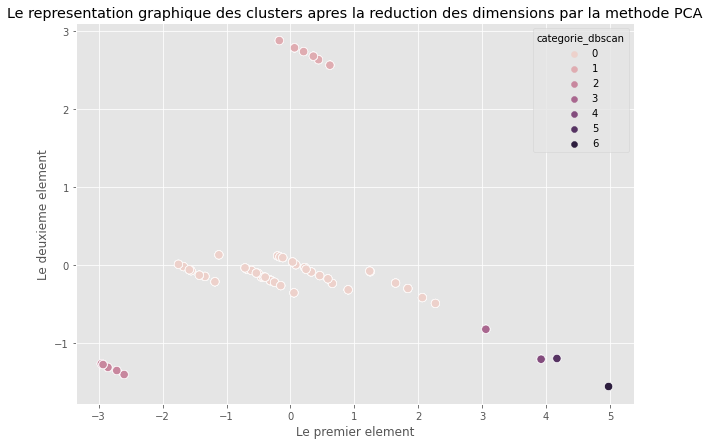

In [179]:
plt.figure(figsize=(10, 7))
sns.scatterplot (x = x_pca[:,0], y= x_pca[:,1], s=70, hue = data_catalogue.categorie_dbscan)
plt.title('Le representation graphique des clusters apres la reduction des dimensions par la methode PCA')
plt.xlabel('Le premier element')
plt.ylabel('Le deuxieme element')
plt.plot()

[]

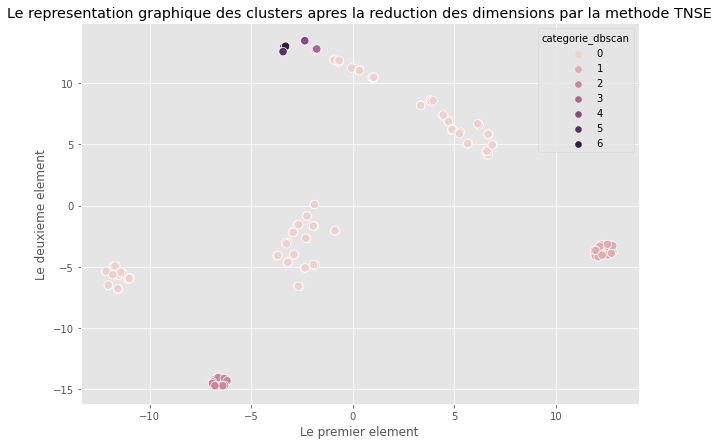

In [180]:
plt.figure(figsize=(10, 7))
sns.scatterplot (x = x_tsne[:,0], y= x_tsne[:,1], s=70, hue = data_catalogue.categorie_dbscan)
plt.title('Le representation graphique des clusters apres la reduction des dimensions par la methode TNSE')
plt.xlabel('Le premier element')
plt.ylabel('Le deuxieme element')
plt.plot()

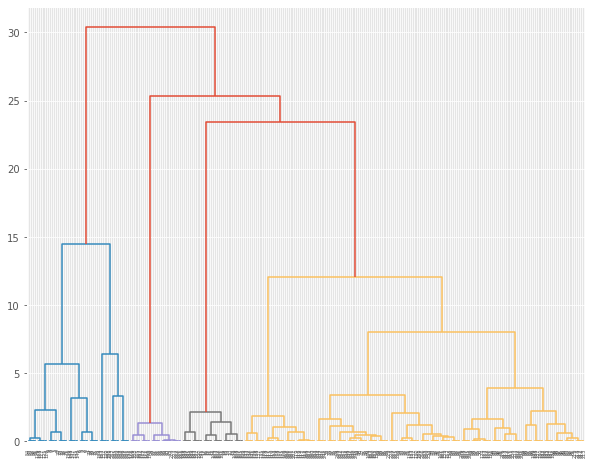

In [182]:
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(x_scaled, method='ward'))
plt.show()

<font color='#FF0000'>- Le dendrograme montre que la plus grande distance verticale qui n'a pas d'intersection avec aucune ligne horizotale de division de cluster nous indique le nombre optimal des cluster pour la methode  `AgglomerativeClustering` et dans notre cas c'est 4 clusters

In [183]:
agglo = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agglo.fit(x_scaled)

AgglomerativeClustering(n_clusters=5)

In [184]:
data_catalogue['categorie_agglo'] = agglo.labels_

In [185]:
data_catalogue.groupby('categorie_agglo').mean() 

,puissance,longueur,nbPlaces,nbPortes,occasion,prix,categorie_kmeans,categorie_dbscan
categorie_agglo,,,,,,,,
0,128.818182,1.151515,5.0,5.0,0.424242,20887.939394,2.545455,0.000000
1,440.000000,3.000000,5.0,5.0,0.333333,87486.666667,1.000000,5.000000
2,69.600000,0.000000,5.0,3.0,0.400000,10508.000000,2.000000,2.000000
3,143.000000,2.000000,7.0,5.0,0.333333,22263.833333,3.000000,1.000000
4,247.571429,3.000000,5.0,5.0,0.428571,43170.000000,0.142857,0.428571


In [186]:
data_catalogue.groupby('categorie_agglo').count() 

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,categorie_kmeans,categorie_dbscan
categorie_agglo,,,,,,,,,,,
0,165,165,165,165,165,165,165,165,165,165,165
1,15,15,15,15,15,15,15,15,15,15,15
2,25,25,25,25,25,25,25,25,25,25,25
3,30,30,30,30,30,30,30,30,30,30,30
4,35,35,35,35,35,35,35,35,35,35,35


[]

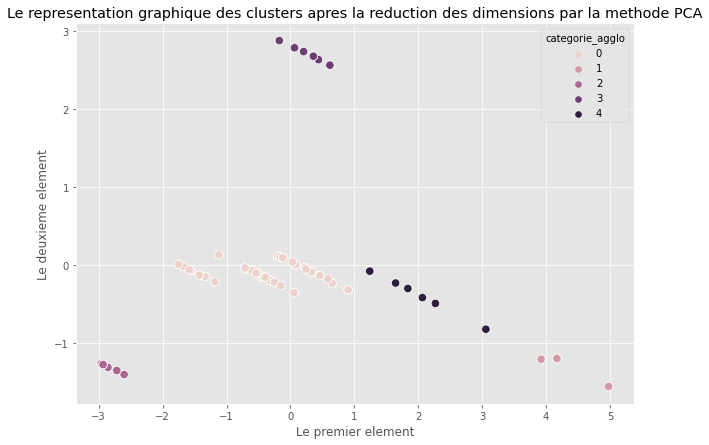

In [187]:
plt.figure(figsize=(10, 7))
sns.scatterplot (x = x_pca[:,0], y= x_pca[:,1], s=70, hue = data_catalogue.categorie_agglo)
plt.title('Le representation graphique des clusters apres la reduction des dimensions par la methode PCA')
plt.xlabel('Le premier element')
plt.ylabel('Le deuxieme element')
plt.plot()

[]

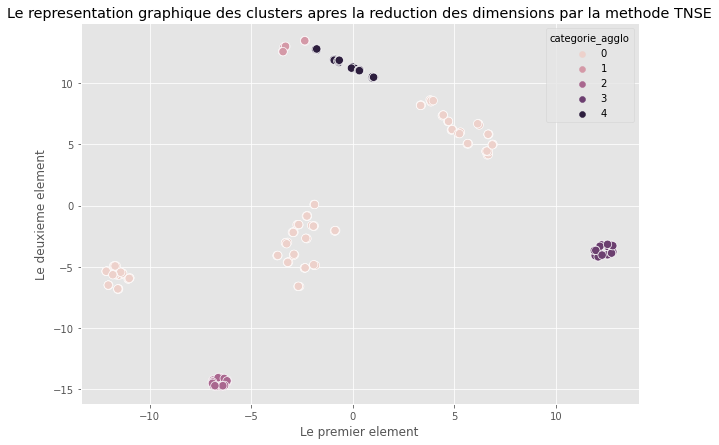

In [188]:
plt.figure(figsize=(10, 7))
sns.scatterplot (x = x_tsne[:,0], y= x_tsne[:,1], s=70, hue = data_catalogue.categorie_agglo)
plt.title('Le representation graphique des clusters apres la reduction des dimensions par la methode TNSE')
plt.xlabel('Le premier element')
plt.ylabel('Le deuxieme element')
plt.plot()

In [189]:
data_immatriculations_x = data_immatriculations.drop(columns = 'immatriculation')

In [190]:
data_immatriculations_x.longueur.replace(['courte','moyenne','longue','très longue'],[0,1,2,3],inplace=True)

In [191]:
data_immatriculations_x

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,Renault,Laguna 2.0T,170,2,5,5,blanc,False,27300
1,Volvo,S80 T6,272,3,5,5,noir,False,50500
2,Volkswagen,Golf 2.0 FSI,150,1,5,5,gris,True,16029
3,Peugeot,1007 1.4,75,0,5,5,blanc,True,9625
4,Audi,A2 1.4,75,0,5,5,gris,False,18310
...,...,...,...,...,...,...,...,...,...
1999995,Mercedes,S500,306,3,5,5,gris,True,70910
1999996,Lancia,Ypsilon 1.4 16V,90,0,5,3,blanc,True,9450
1999997,Ford,Mondeo 1.8,125,2,5,5,rouge,False,23900
1999998,Audi,A2 1.4,75,0,5,5,bleu,True,12817


In [192]:
data_immatriculations_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999976 entries, 0 to 1999999
Data columns (total 9 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   marque     object
 1   nom        object
 2   puissance  int64 
 3   longueur   int64 
 4   nbPlaces   int64 
 5   nbPortes   int64 
 6   couleur    object
 7   occasion   bool  
 8   prix       int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 139.2+ MB


In [193]:
data_immatriculations_x.drop(columns = ['couleur','marque','nom','occasion'], inplace = True)

In [194]:
data_immatriculations_x_scaled = scaler.fit_transform(data_immatriculations_x)

In [195]:
cat=km.predict(data_immatriculations_x_scaled)

In [196]:
data_immatriculations.groupby(cat).mean() 

,puissance,nbPlaces,nbPortes,occasion,prix
0,214.079794,5.0,5.0,0.331159,38658.505368
1,480.097128,5.0,5.0,0.304148,87020.031059
2,58.828841,5.0,3.0,0.209777,10981.259425
4,102.058926,5.0,5.0,0.314883,17842.061505


In [197]:
data_immatriculations.groupby(cat).count() 

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,782654,782654,782654,782654,782654,782654,782654,782654,782654,782654
1,296208,296208,296208,296208,296208,296208,296208,296208,296208,296208
2,131568,131568,131568,131568,131568,131568,131568,131568,131568,131568
4,789546,789546,789546,789546,789546,789546,789546,789546,789546,789546


In [198]:
data_immatriculations.groupby('nbPlaces').count()

,immatriculation,marque,nom,puissance,longueur,nbPortes,couleur,occasion,prix
nbPlaces,,,,,,,,,
5,1999976,1999976,1999976,1999976,1999976,1999976,1999976,1999976,1999976


In [199]:
data_immatriculations['categorie'] = cat

In [200]:
data_client_cat = pd.merge(data_client, data_immatriculations, on=['immatriculation'],how="inner")

In [201]:
data_client_cat.drop(columns = ['prix','occasion','couleur','nbPortes','nbPlaces','longueur','puissance','nom','marque','immatriculation'], inplace = True)

In [202]:
data_client_cat

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,voiture_2eme,categorie
0,80,F,475,Couple,4,true,0
1,61,M,565,Couple,0,true,4
2,56,M,400,Couple,4,false,0
3,79,M,535,Couple,0,false,0
4,50,M,1263,Couple,4,false,1
...,...,...,...,...,...,...,...
195224,19,M,446,Couple,1,false,1
195225,30,F,590,Single,0,false,4
195226,53,M,176,Couple,3,false,0
195227,73,M,557,Couple,0,false,0


## 5.Analyse exploratoire des données du client apres l'ajout de la colonne categorie

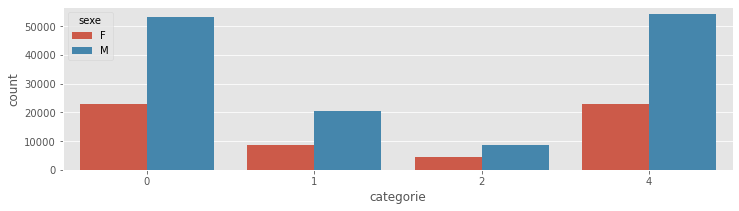

In [203]:
sns.countplot(x=data_client_cat.categorie, hue=data_client_cat.sexe)
plt.show()

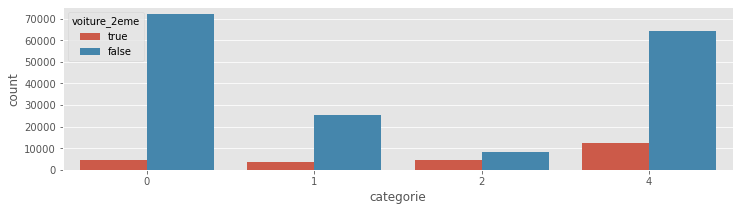

In [204]:
sns.countplot(x=data_client_cat.categorie, hue=data_client_cat.voiture_2eme)
plt.show()

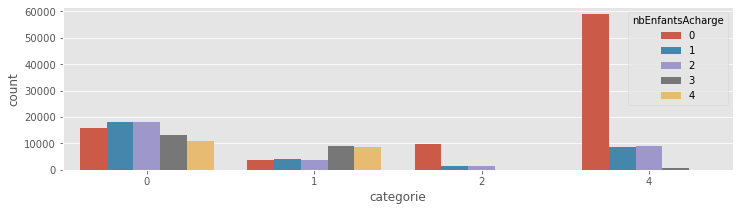

In [205]:
sns.countplot(x=data_client_cat.categorie, hue=data_client_cat.nbEnfantsAcharge)
plt.show()

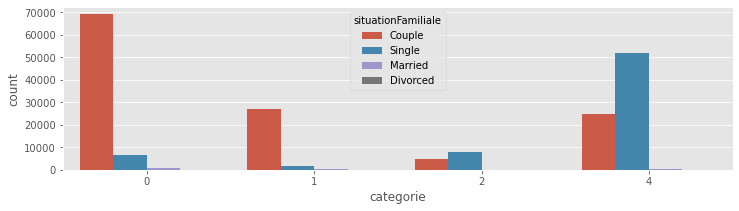

In [206]:
sns.countplot(x=data_client_cat.categorie, hue=data_client_cat.situationFamiliale)
plt.show()

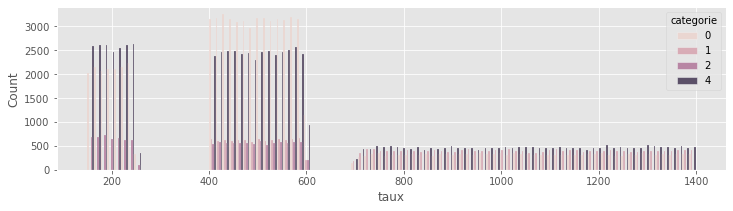

In [207]:
sns.histplot(x=data_client_cat.taux,  hue=data_client_cat.categorie, multiple="dodge")
plt.show()

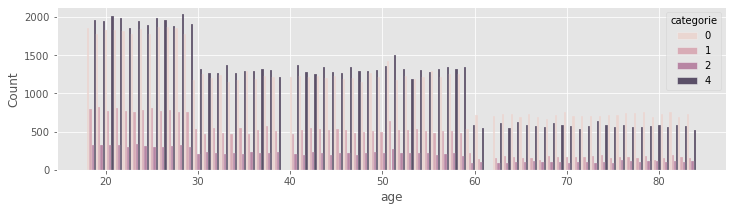

In [208]:
sns.histplot(x=data_client_cat.age,  hue=data_client_cat.categorie, multiple="dodge")
plt.show()

## 6.Classification des clients suivant les données et les categories de voitures

In [209]:
data_client_cat.situationFamiliale.replace(['Couple','Single','Married','Divorced'],[0,1,2,3],inplace = True)

In [210]:
data_client_cat.sexe.replace(['F','M'],[0,1],inplace = True)

In [211]:
data_client_cat.voiture_2eme.replace(['true','false'],[True,False],inplace = True)

In [212]:
data_client_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195229 entries, 0 to 195228
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   age                 195229 non-null  int32
 1   sexe                195229 non-null  int64
 2   taux                195229 non-null  int32
 3   situationFamiliale  195229 non-null  int64
 4   nbEnfantsAcharge    195229 non-null  int32
 5   voiture_2eme        195229 non-null  bool 
 6   categorie           195229 non-null  int32
dtypes: bool(1), int32(4), int64(2)
memory usage: 11.7 MB


<font color='#9CCC65'>**Utilisation de l'algorithme de l'arbre de decision**

In [213]:
feature_cols = ['age', 'sexe', 'taux', 'situationFamiliale', 'nbEnfantsAcharge', 'voiture_2eme']
X = data_client_cat[feature_cols]
y = data_client_cat.categorie

In [229]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

In [231]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [232]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6964947327084293


In [233]:
print(clf.tree_.max_depth)

53


In [218]:
feature_cols = ['age', 'sexe', 'taux', 'situationFamiliale', 'nbEnfantsAcharge', 'voiture_2eme']
X = data_client_cat[feature_cols]
y = data_client_cat.categorie

In [219]:
X_scaled = scaler.fit_transform(X)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

In [221]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [224]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6956751865321245


<font color='#9CCC65'>**Optimisation de la profondeur de l'arbre par la cross validation**
    
Nous alons definir une fonction pour trouver la valeur optimal de la profondeur de l'arbre `depth()`

In [239]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [240]:
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X, y, sm_tree_depths)

In [242]:

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-6 tree achieves the best mean cross-validation accuracy 78.06832 +/- 0.13134% on training dataset


In [238]:
clf2 = DecisionTreeClassifier(max_depth=6)
clf2 = clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7803445508716215


In [287]:
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_scaled, y, sm_tree_depths)

In [291]:

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
sm_best_tree_cv_score

0.7806831866904924

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (120,40), dpi=300)
tree.plot_tree(clf2,fontsize=10,feature_names =feature_cols,filled = True,class_names=['0','1','2','3'])
# feature_names = fn, 
#                class_names=cn,
#                filled = True
plt.show()
fig.savefig('C:/Users/HAMZA/Desktop/Studies/BIHAR/TPT/Donnees par groupe/Groupe_TPT_4/Groupe_TPT_4/imagename.png')

In [116]:
clf3=RandomForestClassifier()
clf3.fit(X_train,y_train)
y_pred=clf3.predict(X_test)

In [117]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7227543581075313


In [120]:
def run_cross_validation_on_forest(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths: 
            forest_model = RandomForestClassifier(n_estimators=3,max_depth=depth)
            cv_scores = cross_val_score(forest_model, X, y, cv=cv, scoring=scoring)
            cv_scores_list.append(cv_scores)
            cv_scores_mean.append(cv_scores.mean())
            cv_scores_std.append(cv_scores.std())
            accuracy_scores.append(forest_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [121]:
sm_tree_depths = range(1,25)
sm_estimators = range(1,10)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_forest(X_scaled, y, sm_tree_depths)

In [122]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-10 tree achieves the best mean cross-validation accuracy 77.89826 +/- 0.07632% on training dataset


In [123]:
clf4=RandomForestClassifier(n_estimators=3,max_depth=10)
clf4.fit(X_train,y_train)
y_pred=clf4.predict(X_test)

In [124]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7773395482251703


In [126]:
clf5=LogisticRegression(multi_class='multinomial',solver='newton-cg')
clf5.fit(X_train,y_train)
y_pred=clf5.predict(X_test)

In [127]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7279106694667827


In [ ]:
penalty = ['l2']
max_iter = [80, 100, 140]
C= np.linspace(0.1, 1.0, num=5)
param_grid = dict(max_iter=max_iter, C=C, penalty=penalty)
clf5=LogisticRegression(multi_class='multinomial',solver='newton-cg')
grid = GridSearchCV(estimator=clf5, param_grid=param_grid, cv = 5)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [128]:
clf6=LogisticRegression(multi_class='multinomial',solver='newton-cg', max_iter=80, C=0.1, penalty='l2')
clf6.fit(X_train,y_train)
y_pred=clf6.predict(X_test)

In [129]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7281667776468781


In [247]:
from   sklearn.neural_network  import MLPClassifier
clf7 = MLPClassifier(alpha=0.1, hidden_layer_sizes=(25,25), max_iter=10000, random_state=3)
clf7.fit(X_train, y_train) 
y_pred = clf7.predict(X_test)

In [248]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7793884136659325


In [253]:
data_marketing.situationFamiliale.replace(['En Couple','Célibataire'],[0,1],inplace = True)

In [254]:
data_marketing.sexe.replace(['F','M'],[0,1],inplace = True)

In [255]:
data_marketing.rename(columns={'2eme voiture': 'voiture_2eme'},inplace = True)

In [257]:
marketing_scaled = scaler.fit_transform(data_marketing)

In [258]:
y_pred=clf2.predict(marketing_scaled)

In [259]:
marketing_scaled = scaler.fit_transform(data_marketing)

In [260]:
data_marketing['categorie']=y_pred

In [261]:
data_marketing

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,voiture_2eme,categorie
0,21,0,1396,1,0,False,0
1,35,1,223,1,0,False,4
2,48,1,401,1,0,False,0
3,26,0,420,0,3,True,0
4,80,1,530,0,3,False,0
5,27,0,153,0,2,False,0
6,59,0,572,0,2,False,0
7,43,0,431,1,0,False,0
8,64,1,559,1,0,False,0
9,22,1,154,0,1,False,4
